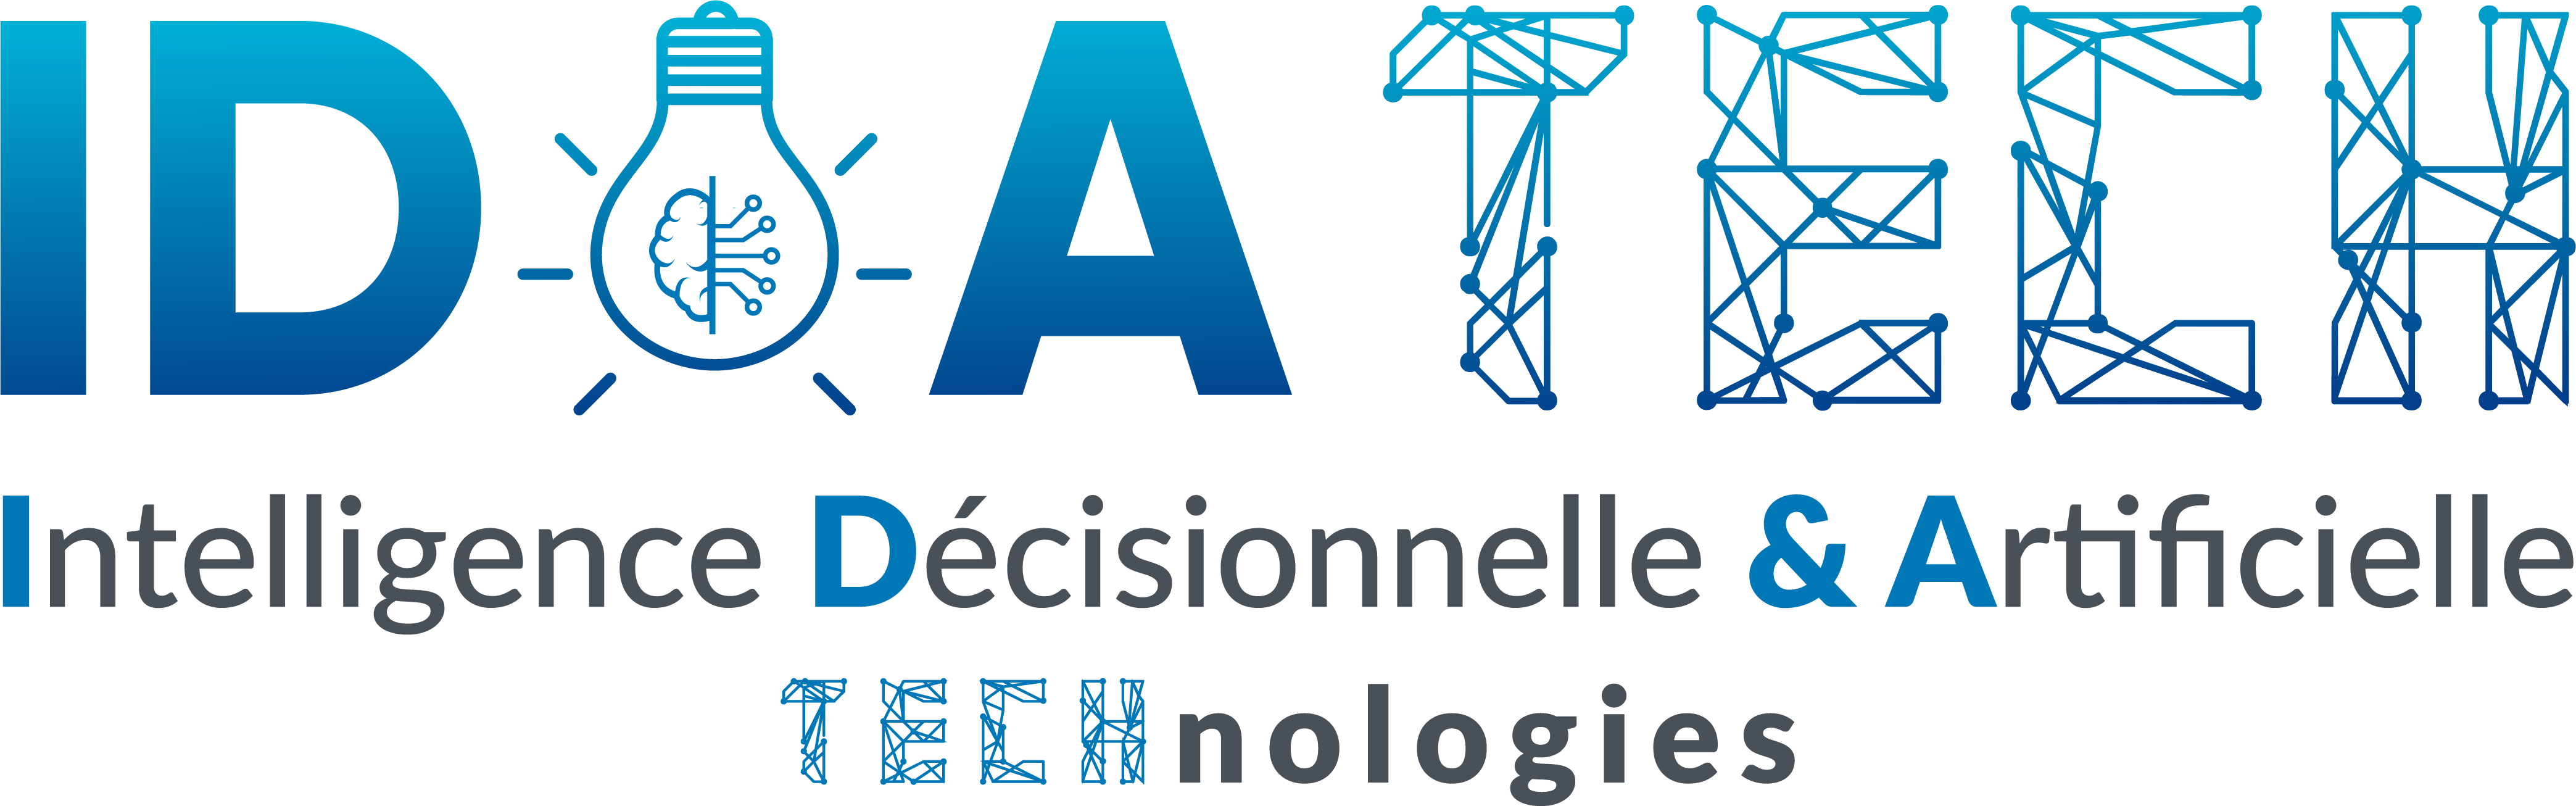

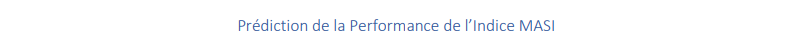

# Compréhension du Problème

L'étape initiale de notre démarche consiste à acquérir une compréhension approfondie du problème posé dans le cadre de cette étude de cas. Notre objectif principal est de développer un modèle prédictif visant à estimer la performance future de l'indice MASI, qui représente la performance globale du marché boursier marocain. Cette tâche cruciale s'accompagne également de l'identification des facteurs clés qui influencent les rendements de cet indice.

**Données Disponibles :**

Nous disposons de plusieurs feuilles de données, chacune fournissant des informations spécifiques. Les données comprennent l'historique des prix de l'indice MASI au cours des 10 dernières années, des indicateurs macroéconomiques tels que les avoirs officiels de réserve, le taux de change USD/MAD, le taux d'intérêt MONIA, le taux moyen pondéré, l'inflation, ainsi que des données sur d'autres indices sectoriels.

**Objectifs Spécifiques :**

1. **Estimation de la Performance Future :** Le modèle que nous développerons aura pour objectif principal d'estimer avec précision la performance future de l'indice MASI, permettant ainsi des prévisions éclairées dans le contexte du marché boursier marocain.

2. **Identification des Facteurs d'Influence :** Une attention particulière sera accordée à l'identification des facteurs qui exercent une influence significative sur les rendements de l'indice MASI. Cette compréhension approfondie est essentielle pour orienter les décisions d'investissement.

**Approche Prévue :**

Notre approche consistera à mener une analyse exploratoire approfondie des données pour comprendre les tendances, les saisons, et les corrélations. Nous entreprendrons ensuite le prétraitement des données, incluant le nettoyage, la normalisation, et la transformation. Le choix et la justification des modèles de machine learning, tels que la régression linéaire, les forêts aléatoires, et les réseaux de neurones, seront des étapes cruciales. L'entraînement, le test, l'optimisation des modèles, et la validation seront réalisés dans le but d'obtenir des résultats robustes et généralisables.

# Analyse Exploratoire des Données

### Importation de bibliothèques

In [468]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

### Données

In [469]:
# Chargement des données depuis la feuille correspondante dans le fichier Excel

df_Indices_Généraux = pd.read_excel('data/Dataset.xlsx', sheet_name='Indices Généraux')
df_Avoirs_officiels_de_réserve = pd.read_excel('data/Dataset.xlsx', sheet_name='Avoirs officiels de réserve')
df_CHANGE = pd.read_excel('data/Dataset.xlsx', sheet_name='CHANGE')
df_MONIA = pd.read_excel('data/Dataset.xlsx', sheet_name='MONIA')
df_TMP = pd.read_excel('data/Dataset.xlsx', sheet_name='TMP')
df_Inlfation = pd.read_excel('data/Dataset.xlsx', sheet_name='Inlfation')
df_Indices_Taux = pd.read_excel('data/Dataset.xlsx', sheet_name='Indices Taux')
df_Indices_Sectorielles = pd.read_excel('data/Dataset.xlsx', sheet_name='Indices Sectorielles')

#### Exploration des données

In [470]:
print(df_Indices_Généraux.info())
df_Indices_Généraux.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEANCE           2366 non-null   object 
 1   INDICE           2366 non-null   object 
 2   COURS_CLOTURE    2366 non-null   float64
 3   COURS_PLUS_HAUT  2366 non-null   float64
 4   COURS_PLUS_BAS   2366 non-null   float64
 5   COURS_OUVERTURE  2366 non-null   float64
 6   COURS_VEILLE     2366 non-null   float64
 7   VARIATION        2366 non-null   float64
dtypes: float64(6), object(2)
memory usage: 148.0+ KB
None


,SEANCE,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
0,2023-12-08 00:00:00.000,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.49
1,2023-12-07 00:00:00.000,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.59
2,2023-12-06 00:00:00.000,MASI,11757.60,11792.95,11718.07,11759.51,11759.51,-0.02
3,2023-12-05 00:00:00.000,MASI,11759.51,11785.10,11709.49,11728.06,11728.06,0.27
4,2023-12-04 00:00:00.000,MASI,11728.06,11769.43,11702.27,11748.19,11748.19,-0.17


In [510]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df_Indices_Généraux.describe())


Statistiques descriptives :
       COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  \
count    2366.000000      2366.000000     2366.000000      2366.000000   
mean    11007.492700     11046.029461    10962.958392     11003.195150   
std      1228.034432      1234.011316     1225.577153      1230.984464   
min      8796.650391      8837.969727     8789.889648      8796.650391   
25%      9927.517578      9957.692383     9888.077393      9923.909678   
50%     11159.635254     11201.135254    11119.455078     11156.564941   
75%     11969.242559     12012.205000    11918.409902     11971.260000   
max     13991.470000     14012.640000    13950.560000     13991.470000   

       COURS_VEILLE    VARIATION         MOIS  
count   2366.000000  2366.000000  2366.000000  
mean   11006.688533    -0.001067     6.394336  
std     1228.639022     0.344325     3.470631  
min     8796.650391    -3.820000     1.000000  
25%     9927.104736    -0.004097     3.000000  
50%    11158.260

In [471]:
print(df_Avoirs_officiels_de_réserve.info())
df_Avoirs_officiels_de_réserve.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         207 non-null    object 
 1   AVOIRS_OFFICIELS_DE_RESERVE  207 non-null    float64
 2   OR_MONETAIRE                 207 non-null    float64
 3   MONNAIES_ETRANGERES          207 non-null    float64
 4   DEPOTS_ET_TITRES             207 non-null    float64
 5   POSITION_DE_RESERVE_AU_FMI   207 non-null    float64
 6   AVOIRS_EN_DTS                207 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.4+ KB
None


,DATE,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS
0,2023-11-24 00:00:00.000,353.425989,14.340808,10.652710,306.761348,1.982553,19.688569
1,2023-11-17 00:00:00.000,354.640840,14.367116,11.156796,307.408937,1.985926,19.722065
2,2023-11-10 00:00:00.000,354.343008,14.224199,10.500546,307.910884,1.985870,19.721509
3,2023-11-03 00:00:00.000,356.217190,14.495102,10.381617,309.361444,1.986924,19.992103
4,2023-11-02 00:00:00.000,354.366401,14.500079,9.561621,308.357670,1.984031,19.962999


In [472]:
print(df_CHANGE.info())
df_CHANGE.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE_D'EXTRACTION  1000 non-null   object 
 1   Date               1000 non-null   object 
 2   Heure              1000 non-null   object 
 3   Devises            1000 non-null   object 
 4   Cours Minimum      1000 non-null   float64
 5   Cours Maximum      1000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB
None


,DATE_D'EXTRACTION,Date,Heure,Devises,Cours Minimum,Cours Maximum
0,2023-12-08 15:04:16.000,2023-12-08 00:00:00.000,08:30:00.0000000,1 Dollar u.s.a.,9.4657,10.4621
1,2023-12-08 15:04:16.000,2023-12-08 00:00:00.000,11:54:52.0000000,1 Dollar u.s.a.,9.4610,10.4569
2,2023-12-07 15:04:21.000,2023-12-07 00:00:00.000,08:30:00.0000000,1 Dollar u.s.a.,9.4681,10.4648
3,2023-12-07 15:04:21.000,2023-12-07 00:00:00.000,11:54:59.0000000,1 Dollar u.s.a.,9.4679,10.4645
4,2023-12-06 15:05:57.000,2023-12-06 00:00:00.000,08:30:00.0000000,1 Dollar u.s.a.,9.4607,10.4566


In [473]:
print(df_MONIA.info())
df_MONIA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date de référence  985 non-null    object 
 1   Indice MONIA       985 non-null    float64
 2   Volume JJ          985 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.2+ KB
None


,Date de référence,Indice MONIA,Volume JJ
0,2023-12-06 00:00:00.000,2.936,10072
1,2023-12-05 00:00:00.000,2.969,7015
2,2023-12-04 00:00:00.000,2.955,9010
3,2023-12-01 00:00:00.000,2.919,11834
4,2023-11-30 00:00:00.000,2.953,8483


In [474]:
print(df_TMP.info())
df_TMP.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SEANCE              963 non-null    object 
 1   TAUX MOYEN PONDERE  963 non-null    float64
 2   VOLUME JJ           894 non-null    float64
 3   ENCOURS             963 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 30.2+ KB
None


,SEANCE,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
0,2023-12-07 00:00:00.000,3.0,2199.0,7769
1,2023-12-06 00:00:00.000,3.0,2389.0,7669
2,2023-12-05 00:00:00.000,3.0,3022.0,8302
3,2023-12-04 00:00:00.000,3.0,4703.0,9833
4,2023-12-03 00:00:00.000,3.0,0.0,7999


In [475]:
print(df_Inlfation.info())
df_Inlfation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MOIS                    21 non-null     object 
 1   INFLATION               21 non-null     float64
 2   INFLATION_SOUS_JACENTE  21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 636.0+ bytes
None


,MOIS,INFLATION,INFLATION_SOUS_JACENTE
0,2023-09-01 00:00:00.000,4.9,4.4
1,2023-08-01 00:00:00.000,5.0,4.7
2,2023-07-01 00:00:00.000,4.9,5.1
3,2023-06-01 00:00:00.000,5.5,5.3
4,2023-05-01 00:00:00.000,7.1,6.1


In [476]:
print(df_Indices_Taux.info())
df_Indices_Taux.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Étiquettes de lignes  738 non-null    object 
 1   NOMINAL 1 AN          738 non-null    float64
 2   NOMINAL 1 MOIS        738 non-null    float64
 3   NOMINAL 10 ANS        738 non-null    float64
 4   NOMINAL 15 ANS        738 non-null    float64
 5   NOMINAL 2 ANS         738 non-null    float64
 6   NOMINAL 20 ANS        738 non-null    float64
 7   NOMINAL 25 ANS        738 non-null    float64
 8   NOMINAL 3 ANS         738 non-null    float64
 9   NOMINAL 3 MOIS        738 non-null    float64
 10  NOMINAL 30 ANS        738 non-null    float64
 11  NOMINAL 5 ANS         738 non-null    float64
 12  NOMINAL 6 MOIS        738 non-null    float64
dtypes: float64(12), object(1)
memory usage: 75.1+ KB
None


,Étiquettes de lignes,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS
0,2020-12-31 00:00:00.000,146.923866,141.763410,190.693865,208.460003,151.969539,212.829788,209.840482,156.371593,142.045887,207.292681,166.222277,143.332301
1,2021-01-04 00:00:00.000,146.954357,141.786399,190.731382,208.517471,151.949788,213.091574,210.011436,156.393177,142.068914,207.062027,166.072860,143.355496
2,2021-01-05 00:00:00.000,146.960785,141.792146,190.743671,208.532637,151.957406,213.108447,210.029499,156.401461,142.074691,207.080870,166.082218,143.361278
3,2021-01-06 00:00:00.000,146.990244,141.797894,190.758898,207.424437,152.004977,211.633170,210.583331,156.524217,142.086972,207.422914,165.952036,143.374171
4,2021-01-07 00:00:00.000,146.998817,141.803642,190.772325,207.439769,152.012542,211.650192,210.601359,156.520202,142.090134,207.441745,166.054973,143.365913


In [477]:
print(df_Indices_Sectorielles.info())
df_Indices_Sectorielles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Étiquettes de lignes                                   738 non-null    object 
 1   AGROALIMENTAIRE & PRODUCTION                           540 non-null    float64
 2   ASSURANCES                                             734 non-null    float64
 3   BANQUES                                                734 non-null    float64
 4   BATIMENT & MATERIAUX DE CONSTRUCTION                   734 non-null    float64
 5   BOISSONS                                               734 non-null    float64
 6   CHIMIE                                                 734 non-null    float64
 7   DISTRIBUTEURS                                          734 non-null    float64
 8   ELECTRICITE                                       

,Étiquettes de lignes,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,...,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT
0,2020-12-31 00:00:00.000,30960.09,4384.83,12207.24,16618.35,14278.10,3977.56,31466.88,2044.69,3857.14,...,2450.50,14934.35,1558.13,3230.77,7446.94,924.02,5292.90,18.70,2128.17,2375.80
1,2021-01-04 00:00:00.000,31373.14,4358.02,12307.00,16696.52,14278.10,3985.56,31466.63,2044.69,3857.14,...,2482.15,15389.46,1504.17,3260.00,7593.53,911.26,5262.78,19.42,2106.88,2375.80
2,2021-01-05 00:00:00.000,31415.16,4356.87,12130.07,16177.02,14278.10,3969.16,31426.86,2053.63,3857.14,...,2500.36,15637.88,1504.17,3261.54,7665.01,923.97,5082.04,19.81,2113.49,2388.38
3,2021-01-06 00:00:00.000,31456.46,4343.67,12005.83,16103.71,14278.10,4057.57,31327.99,2044.69,3857.14,...,2558.38,15688.17,1508.33,3307.69,7688.36,922.64,5262.78,20.03,2112.02,2388.38
4,2021-01-07 00:00:00.000,31661.06,4341.60,12118.76,16284.58,14498.94,4088.77,30901.40,2053.63,3857.14,...,2544.30,15424.61,1506.25,3324.62,7675.62,921.80,5083.55,20.02,2119.36,2421.47


### Préparation de données

***Fusionner les différentes feuilles de données en fonction de la colonne commune (dans ce cas : la date)***

- df1 = Indices_Généraux **U** Avoirs_officiels_de_réserve **U** CHANGE **U** MONIA **U** TMP **U** Inlfation

In [479]:
df_Indices_Généraux_Avoirs_officiels_de_réserve = pd.merge(df_Indices_Généraux, df_Avoirs_officiels_de_réserve, left_on='SEANCE', right_on='DATE', how='outer')

df_Indices_Généraux_Avoirs_officiels_de_réserve_CHANGE = pd.merge(df_Indices_Généraux_Avoirs_officiels_de_réserve, df_CHANGE, left_on='SEANCE', right_on='Date', how='outer')

df_Indices_Généraux_Avoirs_officiels_de_réserve_CHANGE_MONIA = pd.merge(df_Indices_Généraux_Avoirs_officiels_de_réserve_CHANGE, df_MONIA, left_on='SEANCE', right_on='Date de référence', how='outer')

df_Indices_Généraux_Avoirs_officiels_de_réserve_CHANGE_MONIA_TMP = pd.merge(df_Indices_Généraux_Avoirs_officiels_de_réserve_CHANGE_MONIA, df_TMP, left_on='SEANCE', right_on='SEANCE', how='outer')

df1 = pd.merge(df_Indices_Généraux_Avoirs_officiels_de_réserve_CHANGE_MONIA_TMP, df_Inlfation, left_on='SEANCE', right_on='MOIS', how='outer')

In [480]:
df1 = df1.drop(["Date","DATE","Date de référence","MOIS"], axis=1)

- df2 = Indices_Taux **U** Indices_Sectorielles 

In [481]:
df_Indices_Taux_Indices_Sectorielles = pd.merge(df_Indices_Taux, df_Indices_Sectorielles, on='Étiquettes de lignes', how='inner')
# Remplacer les valeurs manquantes par la médiane
df2 = df_Indices_Taux_Indices_Sectorielles.fillna(df_Indices_Taux_Indices_Sectorielles.median(numeric_only=True))

### Comprendre les tendances, saisonnalités et  corrélations

#### Cours de Clôture de l'Indice MASI

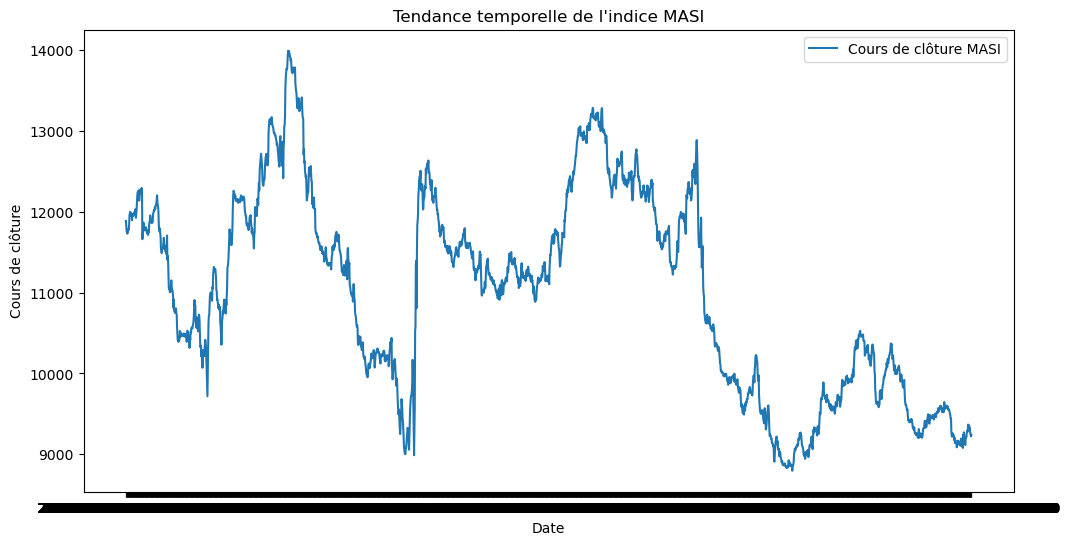

In [482]:
# Explorer les tendances temporelles pour l'indice MASI
plt.figure(figsize=(12, 6))
plt.plot(df_Indices_Généraux['SEANCE'], df_Indices_Généraux['COURS_CLOTURE'], label='Cours de clôture MASI')
plt.title('Tendance temporelle de l\'indice MASI')
plt.xlabel('Date')
plt.ylabel('Cours de clôture')
plt.legend()
plt.show()

- La visualisation montre une tendance générale à la hausse ou à la baisse du cours de clôture de l'indice MASI au fil du temps.
- Des pics ou des creux importants peuvent indiquer des événements économiques majeurs ou des périodes de volatilité.

#### Corrélation entre le Cours de Clôture et la Variation

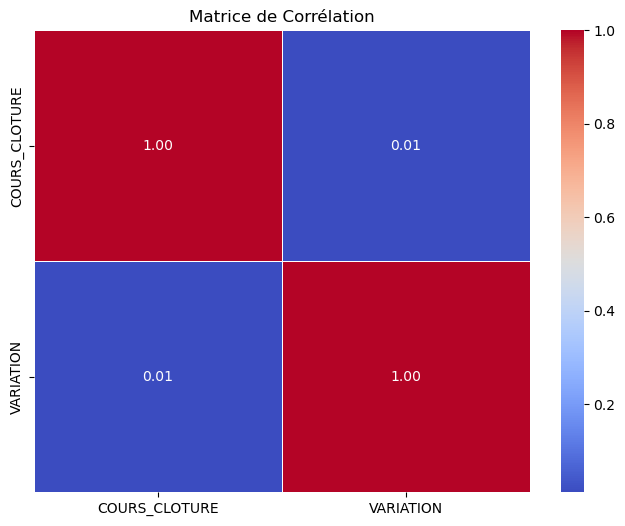

In [483]:
# Examiner la corrélation entre les variables
# (Exemple avec les colonnes 'COURS_CLOTURE' et 'VARIATION' de l'indice MASI)
correlation_matrix = df_Indices_Généraux[['COURS_CLOTURE', 'VARIATION']].corr()

# Utiliser Seaborn pour visualiser la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

- La matrice de corrélation suggère la force et la direction de la relation linéaire entre le cours de clôture et la variation.
- Une corrélation positive indiquerait que le cours de clôture tend à augmenter avec une variation positive et vice versa.

#### Tendance Temporelle des Avoirs Officiels de Réserve

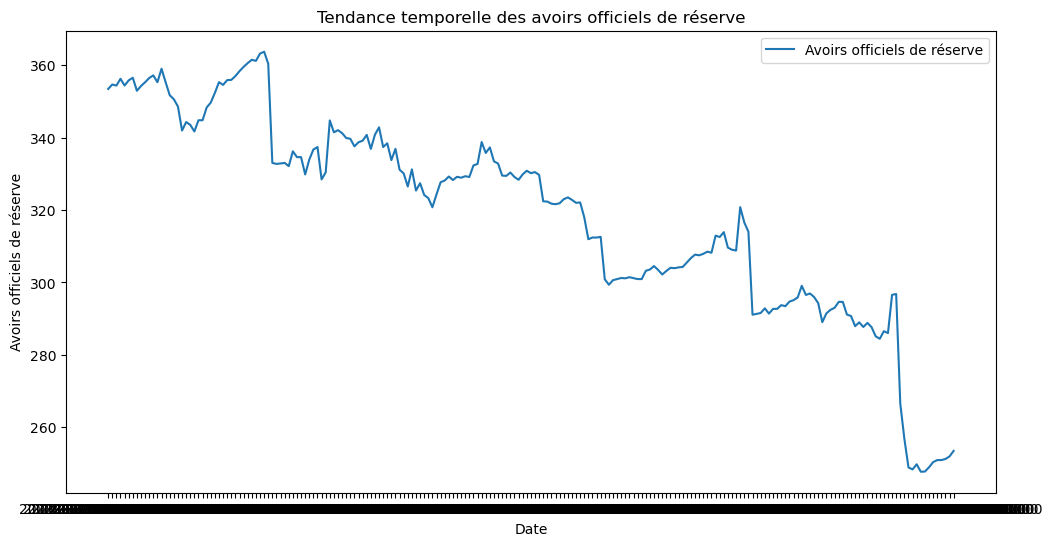

In [484]:
# Explorer les saisons pour les avoirs officiels de réserve
plt.figure(figsize=(12, 6))
plt.plot(df_Avoirs_officiels_de_réserve['DATE'], df_Avoirs_officiels_de_réserve['AVOIRS_OFFICIELS_DE_RESERVE'], label='Avoirs officiels de réserve')
plt.title('Tendance temporelle des avoirs officiels de réserve')
plt.xlabel('Date')
plt.ylabel('Avoirs officiels de réserve')
plt.legend()
plt.show()

- La visualisation des avoirs officiels de réserve montre la fluctuation de ces avoirs au fil du temps.
- Des motifs récurrents peuvent indiquer des tendances saisonnières ou des schémas économiques spécifiques.

#### Distribution des Cours de Clôture de l'Indice MASI

Text(0, 0.5, 'Fréquence')

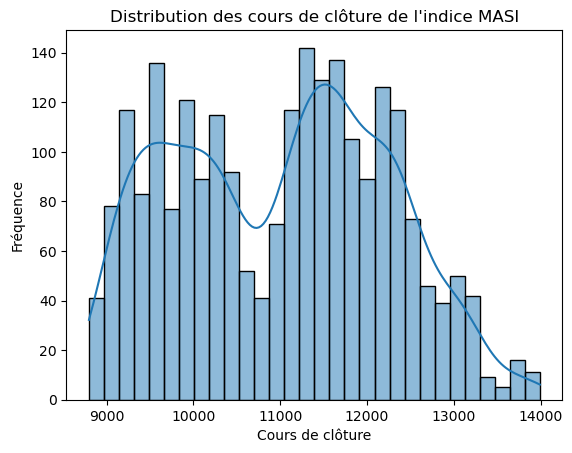

In [485]:
# Explorer la distribution des valeurs pour l'indice MASI
sns.histplot(df_Indices_Généraux['COURS_CLOTURE'], bins=30, kde=True)
plt.title('Distribution des cours de clôture de l\'indice MASI')
plt.xlabel('Cours de clôture')
plt.ylabel('Fréquence')

- La distribution des cours de clôture montre une tendance normale avec une légère asymétrie positive. Cela signifie que la plupart des cours de clôture sont concentrés autour de la moyenne, mais il y a quelques valeurs plus élevées.- 

#### Distribution des cours minimum et maximum

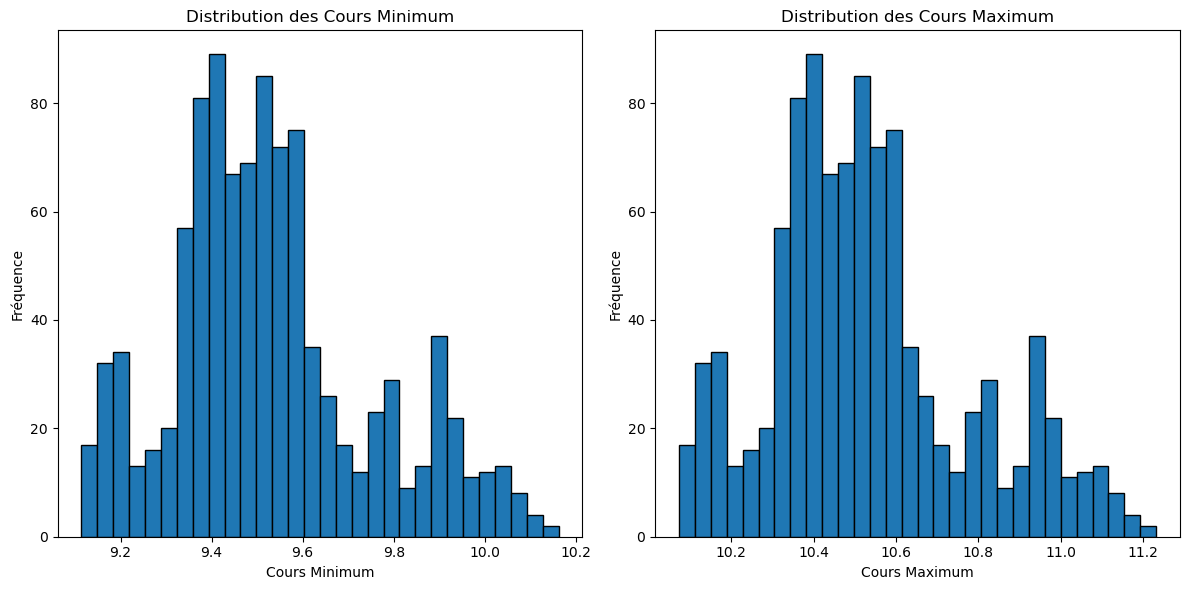

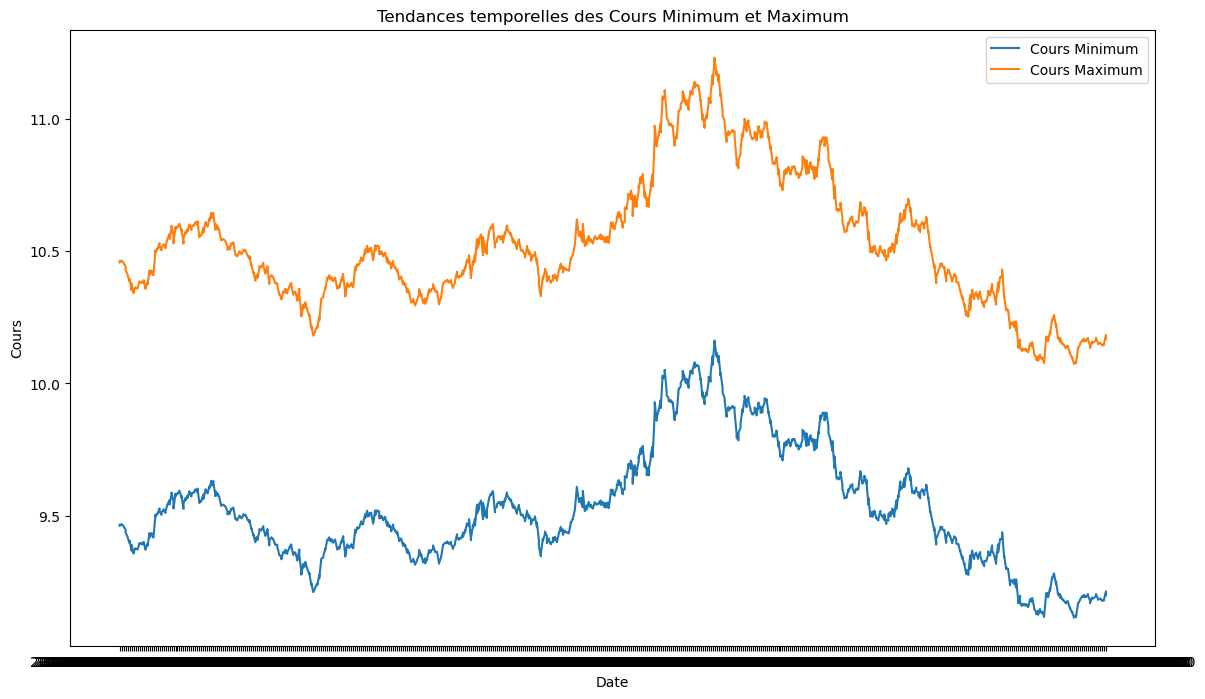

In [511]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_CHANGE['Cours Minimum'], bins=30, edgecolor='black')
plt.title('Distribution des Cours Minimum')
plt.xlabel('Cours Minimum')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
plt.hist(df_CHANGE['Cours Maximum'], bins=30, edgecolor='black')
plt.title('Distribution des Cours Maximum')
plt.xlabel('Cours Maximum')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Tendances temporelles
plt.figure(figsize=(14, 8))
plt.plot(df_CHANGE['Date'], df_CHANGE['Cours Minimum'], label='Cours Minimum')
plt.plot(df_CHANGE['Date'], df_CHANGE['Cours Maximum'], label='Cours Maximum')
plt.title('Tendances temporelles des Cours Minimum et Maximum')
plt.xlabel('Date')
plt.ylabel('Cours')
plt.legend()
plt.show()

#### Distribution de l'Indice MONIA

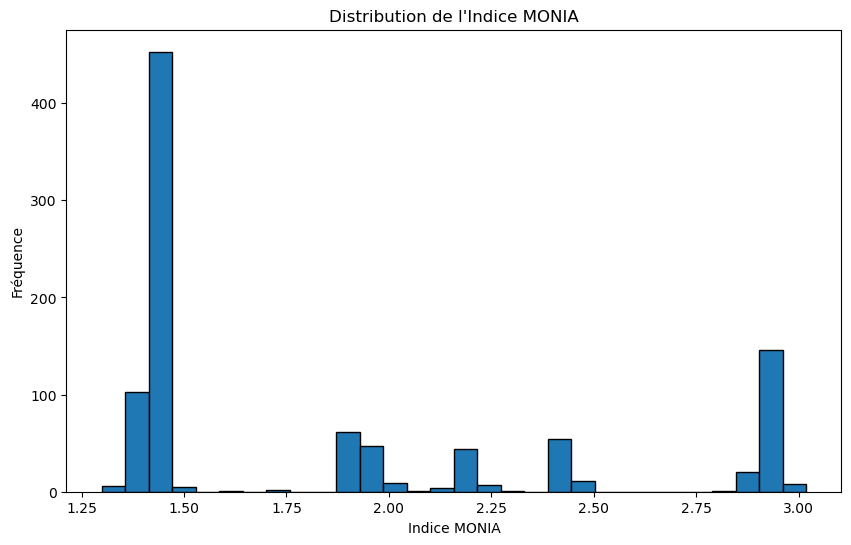

In [513]:
plt.figure(figsize=(10, 6))
plt.hist(df_MONIA['Indice MONIA'], bins=30, edgecolor='black')
plt.title('Distribution de l\'Indice MONIA')
plt.xlabel('Indice MONIA')
plt.ylabel('Fréquence')
plt.show()

#### Distribution du Taux Moyen Ponderé

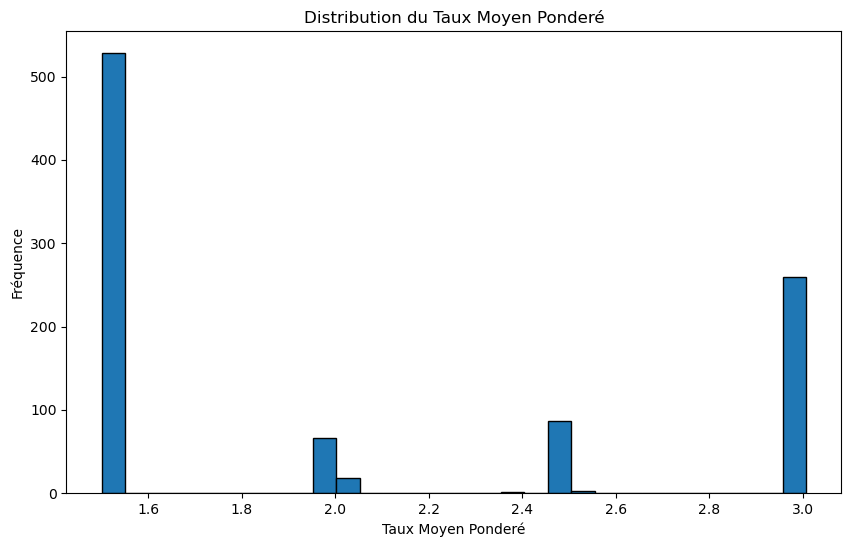

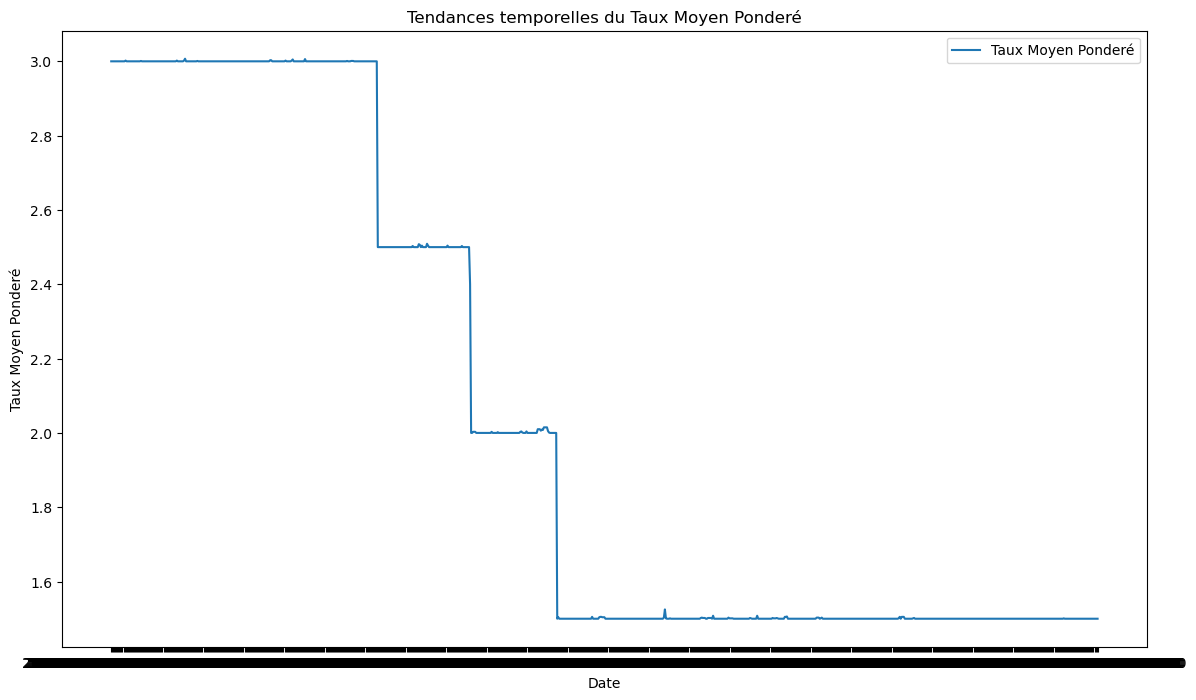

In [514]:
plt.figure(figsize=(10, 6))
plt.hist(df_TMP['TAUX MOYEN PONDERE'], bins=30, edgecolor='black')
plt.title('Distribution du Taux Moyen Ponderé')
plt.xlabel('Taux Moyen Ponderé')
plt.ylabel('Fréquence')
plt.show()

# Tendances temporelles
plt.figure(figsize=(14, 8))
plt.plot(df_TMP['SEANCE'], df_TMP['TAUX MOYEN PONDERE'], label='Taux Moyen Ponderé')
plt.title('Tendances temporelles du Taux Moyen Ponderé')
plt.xlabel('Date')
plt.ylabel('Taux Moyen Ponderé')
plt.legend()
plt.show()

#### Distribution de l'Inflation

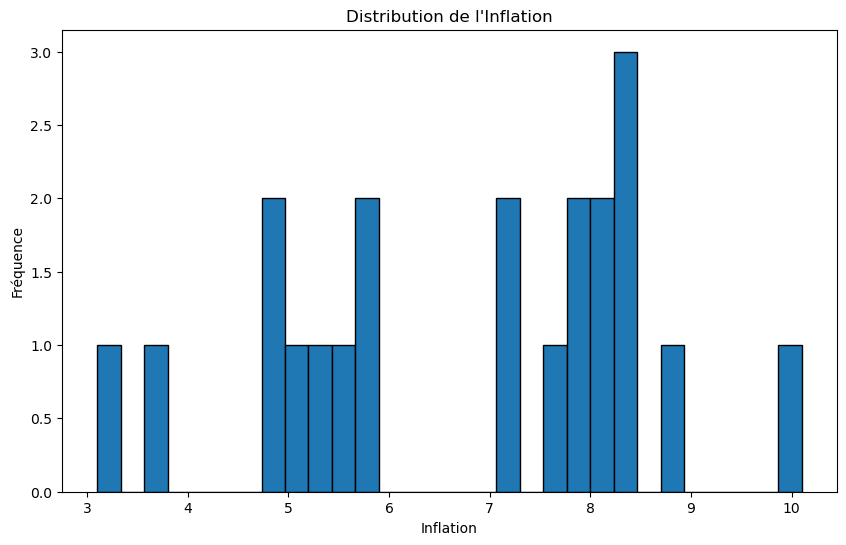

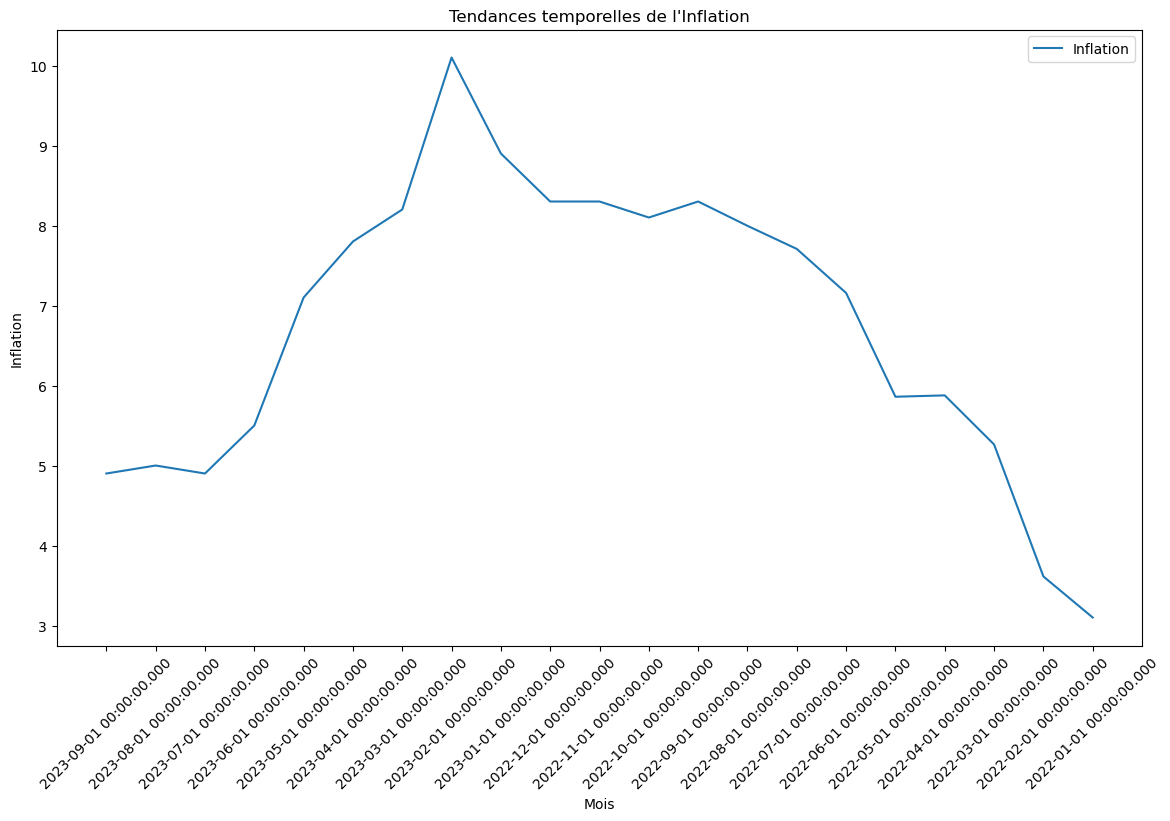

In [519]:
plt.figure(figsize=(10, 6))
plt.hist(df_Inlfation['INFLATION'], bins=30, edgecolor='black')
plt.title('Distribution de l\'Inflation')
plt.xlabel('Inflation')
plt.ylabel('Fréquence')
plt.show()

# Tendances temporelles
plt.figure(figsize=(14, 8))
plt.plot(df_Inlfation['MOIS'], df_Inlfation['INFLATION'], label='Inflation')
plt.title('Tendances temporelles de l\'Inflation')
plt.xlabel('Mois')
plt.ylabel('Inflation')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Distribution des indices sectoriels

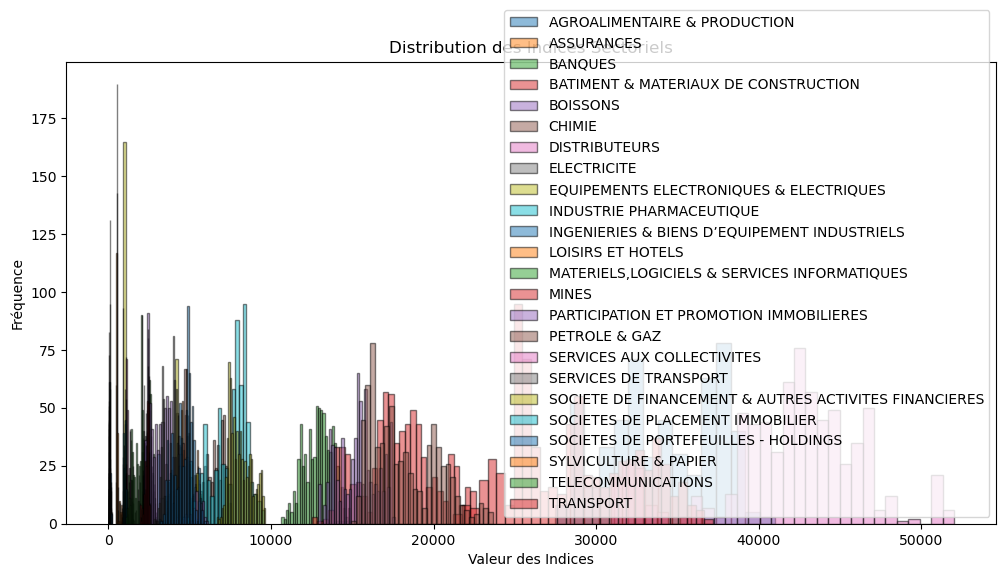

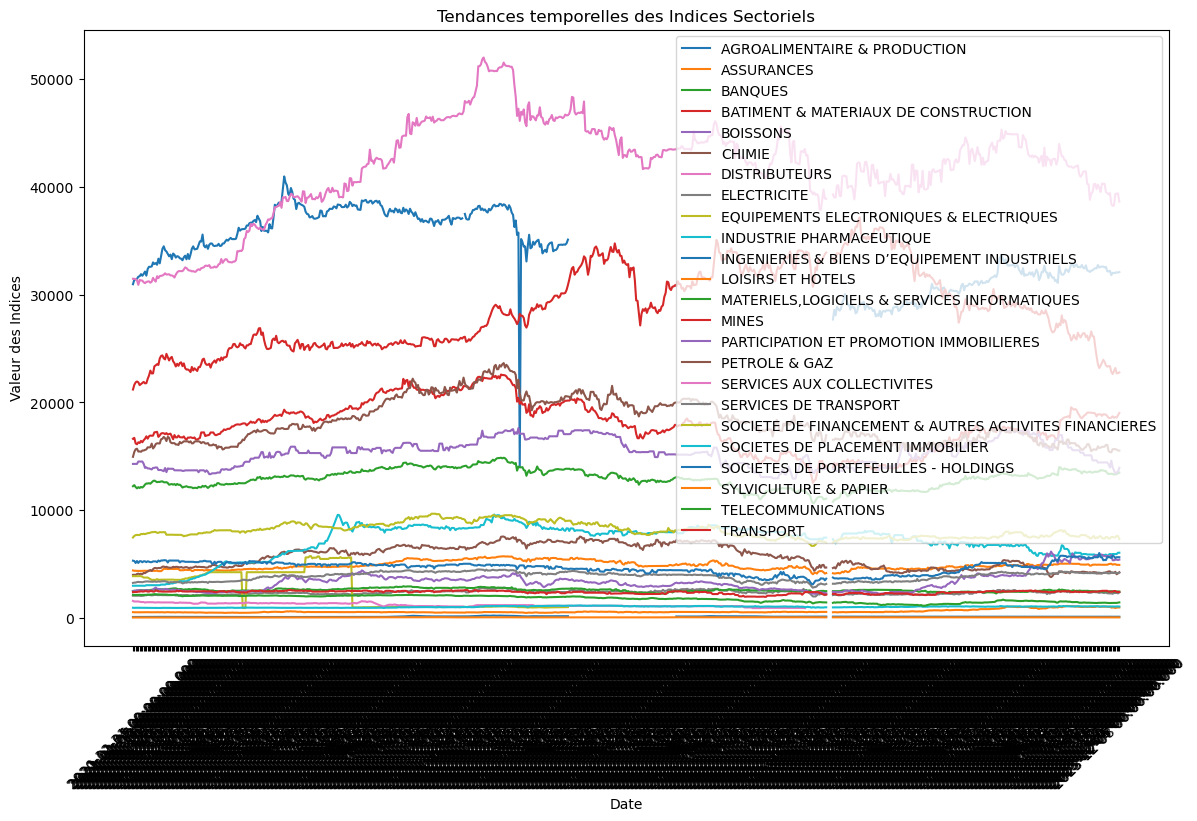

In [520]:
plt.figure(figsize=(12, 6))
for col in df_Indices_Sectorielles.columns[1:]:
    plt.hist(df_Indices_Sectorielles[col], bins=30, edgecolor='black', alpha=0.5, label=col)

plt.title('Distribution des Indices Sectoriels')
plt.xlabel('Valeur des Indices')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Tendances temporelles
plt.figure(figsize=(14, 8))
for col in df_Indices_Sectorielles.columns[1:]:
    plt.plot(df_Indices_Sectorielles['Étiquettes de lignes'], df_Indices_Sectorielles[col], label=col)

plt.title('Tendances temporelles des Indices Sectoriels')
plt.xlabel('Date')
plt.ylabel('Valeur des Indices')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Distribution des indices de taux

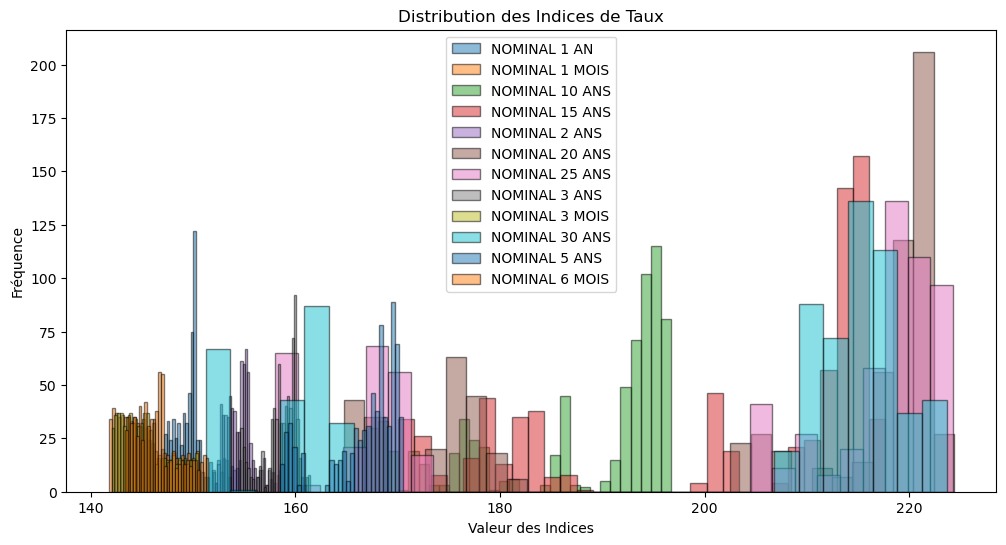

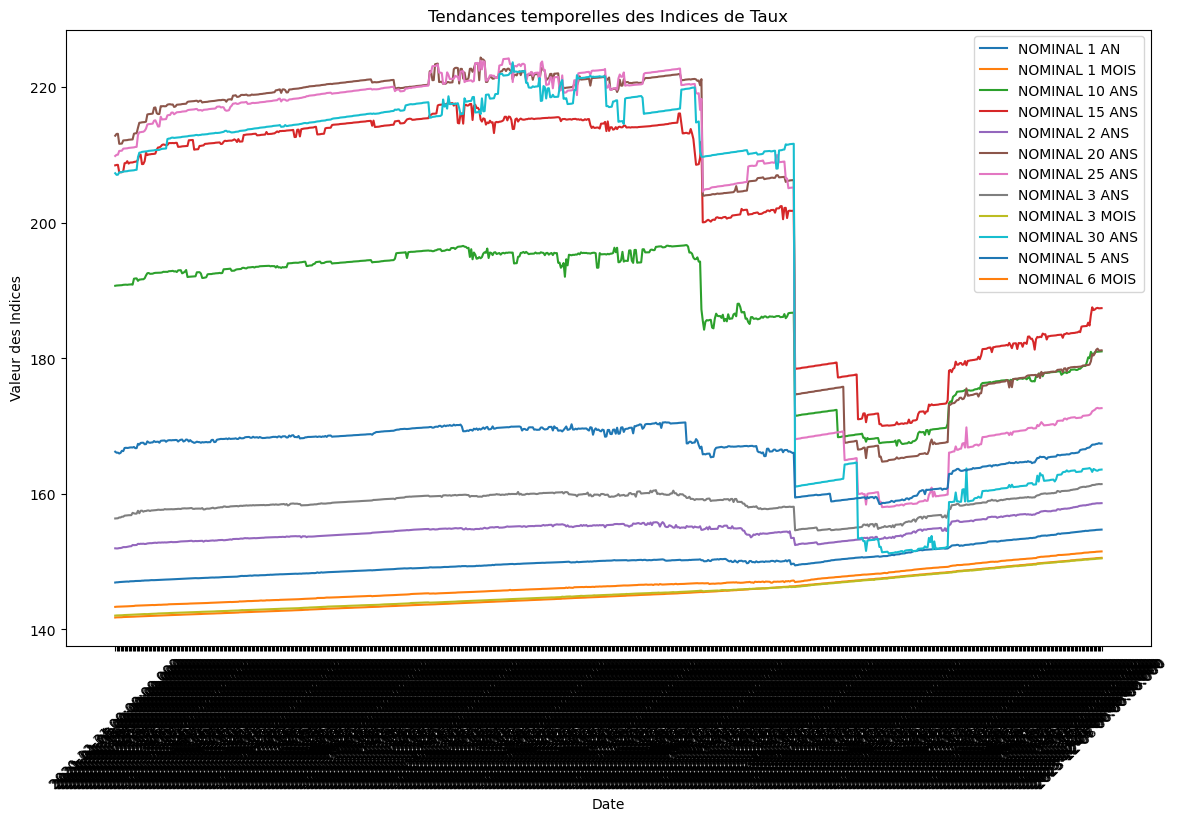

In [521]:
plt.figure(figsize=(12, 6))
for col in df_Indices_Taux.columns[1:]:
    plt.hist(df_Indices_Taux[col], bins=30, edgecolor='black', alpha=0.5, label=col)

plt.title('Distribution des Indices de Taux')
plt.xlabel('Valeur des Indices')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Tendances temporelles
plt.figure(figsize=(14, 8))
for col in df_Indices_Taux.columns[1:]:
    plt.plot(df_Indices_Taux['Étiquettes de lignes'], df_Indices_Taux[col], label=col)

plt.title('Tendances temporelles des Indices de Taux')
plt.xlabel('Date')
plt.ylabel('Valeur des Indices')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Matrice de Corrélation des Variables Macroéconomiques

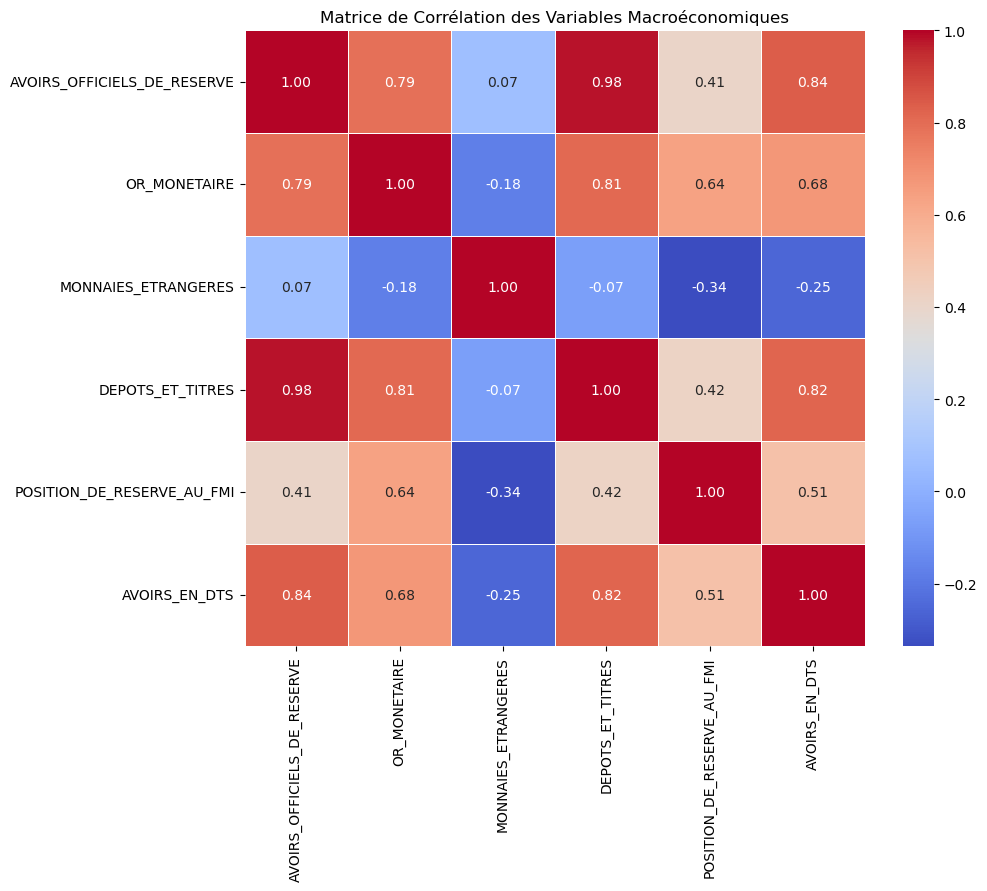

In [486]:
# Explorer la corrélation entre les variables macroéconomiques
macroeconomic_variables = ['AVOIRS_OFFICIELS_DE_RESERVE', 'OR_MONETAIRE', 'MONNAIES_ETRANGERES', 'DEPOTS_ET_TITRES', 'POSITION_DE_RESERVE_AU_FMI', 'AVOIRS_EN_DTS']
correlation_matrix_macroeconomic = df_Avoirs_officiels_de_réserve[macroeconomic_variables].corr()

# Utiliser Seaborn pour visualiser la matrice de corrélation des variables macroéconomiques
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_macroeconomic, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Macroéconomiques')
plt.show()

- La matrice de corrélation entre les variables macroéconomiques dans les avoirs officiels de réserve peut révéler des relations intéressantes. Par exemple, la corrélation entre ***AVOIRS_OFFICIELS_DE_RESERVE*** et ***DEPOTS_ET_TITRES*** est de 0.98, suggérant une forte corrélation positive entre ces deux variables.

In [524]:
# Afficher les corrélations avec la variable cible ('COURS_CLOTURE')
correlation_with_target = correlation_matrix_macroeconomic['COURS_CLOTURE'].sort_values(ascending=False)
print("Corrélations avec COURS_CLOTURE :")
print(correlation_with_target)

Corrélations avec COURS_CLOTURE :
COURS_CLOTURE_NORMALIZED       1.000000
COURS_CLOTURE                  1.000000
COURS_PLUS_BAS                 0.999193
COURS_PLUS_HAUT                0.998937
COURS_OUVERTURE                0.997963
COURS_VEILLE                   0.997940
AVOIRS_EN_DTS                  0.087247
VOLUME JJ                      0.081616
DEPOTS_ET_TITRES               0.046115
AVOIRS_OFFICIELS_DE_RESERVE    0.041746
Volume JJ                      0.040779
VARIATION                      0.012725
OR_MONETAIRE                  -0.025241
INFLATION_SOUS_JACENTE        -0.046525
INFLATION                     -0.048934
POSITION_DE_RESERVE_AU_FMI    -0.068523
MONNAIES_ETRANGERES           -0.069976
Cours Maximum                 -0.115618
Cours Minimum                 -0.115625
ENCOURS                       -0.132115
Indice MONIA                  -0.136589
TAUX MOYEN PONDERE            -0.194446
Name: COURS_CLOTURE, dtype: float64


# Prétraitement des Données

### Nettoyage des Données

**Gestion des Valeurs Manquantes pour *df1***

- Vérifiez s'il y a des valeurs manquantes dans les données.
- Si des valeurs manquantes sont présentes, décider de la stratégie de gestion (imputation, suppression, etc.).

In [487]:
df1 = df1.drop(["INDICE","DATE_D'EXTRACTION","Heure","Devises","SEANCE"], axis=1)

In [488]:
# Remplacer les valeurs NaN par la moyenne (choisir une stratégie appropriée)
imputer = SimpleImputer(strategy='mean')
df11 = imputer.fit_transform(df1)

In [489]:
df11

array([[1.18853200e+04, 1.18853200e+04, 1.18249700e+04, ...,
        8.64073027e+03, 6.80531136e+00, 6.53635491e+00],
       [1.18853200e+04, 1.18853200e+04, 1.18249700e+04, ...,
        8.64073027e+03, 6.80531136e+00, 6.53635491e+00],
       [1.18270200e+04, 1.18270200e+04, 1.17576000e+04, ...,
        7.76900000e+03, 6.80531136e+00, 6.53635491e+00],
       ...,
       [1.11320073e+04, 1.11731355e+04, 1.10873198e+04, ...,
        9.76100000e+03, 6.80531136e+00, 6.53635491e+00],
       [1.11320073e+04, 1.11731355e+04, 1.10873198e+04, ...,
        9.76100000e+03, 6.80531136e+00, 6.53635491e+00],
       [1.11320073e+04, 1.11731355e+04, 1.10873198e+04, ...,
        9.76100000e+03, 6.80531136e+00, 6.53635491e+00]])

In [490]:
df1 = pd.DataFrame(df11, columns=df1.columns)

In [491]:
df1

,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,...,AVOIRS_EN_DTS,Cours Minimum,Cours Maximum,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,INFLATION,INFLATION_SOUS_JACENTE
0,11885.320000,11885.320000,11824.970000,11827.020000,11827.02000,0.490000,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.46570,10.462100,1.960497,9150.810298,2.106015,3189.040346,8640.730268,6.805311,6.536355
1,11885.320000,11885.320000,11824.970000,11827.020000,11827.02000,0.490000,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.46100,10.456900,1.960497,9150.810298,2.106015,3189.040346,8640.730268,6.805311,6.536355
2,11827.020000,11827.020000,11757.600000,11757.600000,11757.60000,0.590000,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.46810,10.464800,1.960497,9150.810298,3.000000,2199.000000,7769.000000,6.805311,6.536355
3,11827.020000,11827.020000,11757.600000,11757.600000,11757.60000,0.590000,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.46790,10.464500,1.960497,9150.810298,3.000000,2199.000000,7769.000000,6.805311,6.536355
4,11757.600000,11792.950000,11718.070000,11759.510000,11759.51000,-0.020000,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.46070,10.456600,2.936000,10072.000000,3.000000,2389.000000,7669.000000,6.805311,6.536355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,11132.007326,11173.135521,11087.319827,11128.451697,11131.49913,-0.001543,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.52856,10.531566,1.960497,9150.810298,1.500000,0.000000,8456.000000,6.805311,6.536355
3390,11132.007326,11173.135521,11087.319827,11128.451697,11131.49913,-0.001543,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.52856,10.531566,1.960497,9150.810298,1.500000,3189.040346,8456.000000,6.805311,6.536355
3391,11132.007326,11173.135521,11087.319827,11128.451697,11131.49913,-0.001543,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.52856,10.531566,1.960497,9150.810298,1.500000,3189.040346,9761.000000,6.805311,6.536355
3392,11132.007326,11173.135521,11087.319827,11128.451697,11131.49913,-0.001543,326.218091,12.867921,17.586137,277.515546,...,16.280986,9.52856,10.531566,1.960497,9150.810298,1.500000,3189.040346,9761.000000,6.805311,6.536355


In [492]:
# Vérifier s'il y a des valeurs manquantes dans les données
missing_values = df1.isnull().sum()
print("Nombre de valeurs manquantes par colonne :\n", missing_values)

Nombre de valeurs manquantes par colonne :
 COURS_CLOTURE                  0
COURS_PLUS_HAUT                0
COURS_PLUS_BAS                 0
COURS_OUVERTURE                0
COURS_VEILLE                   0
VARIATION                      0
AVOIRS_OFFICIELS_DE_RESERVE    0
OR_MONETAIRE                   0
MONNAIES_ETRANGERES            0
DEPOTS_ET_TITRES               0
POSITION_DE_RESERVE_AU_FMI     0
AVOIRS_EN_DTS                  0
Cours Minimum                  0
Cours Maximum                  0
Indice MONIA                   0
Volume JJ                      0
TAUX MOYEN PONDERE             0
VOLUME JJ                      0
ENCOURS                        0
INFLATION                      0
INFLATION_SOUS_JACENTE         0
dtype: int64


- Aucune valeur manquante n'a été détectée dans les données ***df1***. Cela suggère que les données sont relativement complètes et peuvent être utilisées pour une analyse plus approfondie.

**Gestion des Valeurs Manquantes pour *df2***

In [493]:
missing_values = df2.isnull().sum()
print("Nombre de valeurs manquantes par colonne des Avoirs Officiels de Réserve :\n", missing_values)

Nombre de valeurs manquantes par colonne des Avoirs Officiels de Réserve :
 Étiquettes de lignes                                     0
NOMINAL 1 AN                                             0
NOMINAL 1 MOIS                                           0
NOMINAL 10 ANS                                           0
NOMINAL 15 ANS                                           0
NOMINAL 2 ANS                                            0
NOMINAL 20 ANS                                           0
NOMINAL 25 ANS                                           0
NOMINAL 3 ANS                                            0
NOMINAL 3 MOIS                                           0
NOMINAL 30 ANS                                           0
NOMINAL 5 ANS                                            0
NOMINAL 6 MOIS                                           0
AGROALIMENTAIRE & PRODUCTION                             0
ASSURANCES                                               0
BANQUES                                

- Aucune valeur manquante n'a été détectée dans les données ***df2***. Cela suggère que les données sont relativement complètes et peuvent être utilisées pour une analyse plus approfondie.

### Normalisation des Données

**Pour l'indice MASI : Normalisation des Cours de Clôture**

- La normalisation peut aider à mettre les variables à des échelles comparables.

In [494]:
from sklearn.preprocessing import MinMaxScaler

# Normalisation des cours de clôture
scaler = MinMaxScaler()
df1['COURS_CLOTURE_NORMALIZED'] = scaler.fit_transform(df1[['COURS_CLOTURE']])

**Pour les Avoirs Officiels de Réserve : Normalisation des Variables Macroéconomiques**

- Appliquez la normalisation aux variables macroéconomiques si nécessaire.

In [495]:
# Exemple de normalisation pour les avoirs officiels de réserve
df_Avoirs_officiels_de_réserve_normalized = scaler.fit_transform(df1[macroeconomic_variables])

**Tout**

In [496]:
df1_norm = scaler.fit_transform(df1)
df1_norm = pd.DataFrame(df1_norm, columns=df1.columns)
df1_norm

,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,...,Cours Minimum,Cours Maximum,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,INFLATION,INFLATION_SOUS_JACENTE,COURS_CLOTURE_NORMALIZED
0,0.594567,0.588897,0.588117,0.583345,0.583345,0.484270,0.676782,0.57122,0.434277,0.651262,...,0.335624,0.335664,0.384815,0.370608,0.402133,0.204308,0.347388,0.52933,0.573121,0.594567
1,0.594567,0.588897,0.588117,0.583345,0.583345,0.484270,0.676782,0.57122,0.434277,0.651262,...,0.331138,0.331175,0.384815,0.370608,0.402133,0.204308,0.347388,0.52933,0.573121,0.594567
2,0.583345,0.577631,0.575063,0.569981,0.569981,0.495506,0.676782,0.57122,0.434277,0.651262,...,0.337914,0.337995,0.384815,0.370608,0.995355,0.140880,0.288878,0.52933,0.573121,0.583345
3,0.583345,0.577631,0.575063,0.569981,0.569981,0.495506,0.676782,0.57122,0.434277,0.651262,...,0.337723,0.337736,0.384815,0.370608,0.995355,0.140880,0.288878,0.52933,0.573121,0.583345
4,0.569981,0.571047,0.567403,0.570349,0.570349,0.426966,0.676782,0.57122,0.434277,0.651262,...,0.330852,0.330916,0.952298,0.425798,0.995355,0.153053,0.282167,0.52933,0.573121,0.569981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.449555,0.451269,0.445181,0.448871,0.449457,0.429040,0.676782,0.57122,0.434277,0.651262,...,0.395610,0.395637,0.384815,0.370608,0.000000,0.000000,0.334989,0.52933,0.573121,0.449555
3390,0.449555,0.451269,0.445181,0.448871,0.449457,0.429040,0.676782,0.57122,0.434277,0.651262,...,0.395610,0.395637,0.384815,0.370608,0.000000,0.204308,0.334989,0.52933,0.573121,0.449555
3391,0.449555,0.451269,0.445181,0.448871,0.449457,0.429040,0.676782,0.57122,0.434277,0.651262,...,0.395610,0.395637,0.384815,0.370608,0.000000,0.204308,0.422579,0.52933,0.573121,0.449555
3392,0.449555,0.451269,0.445181,0.448871,0.449457,0.429040,0.676782,0.57122,0.434277,0.651262,...,0.395610,0.395637,0.384815,0.370608,0.000000,0.204308,0.422579,0.52933,0.573121,0.449555


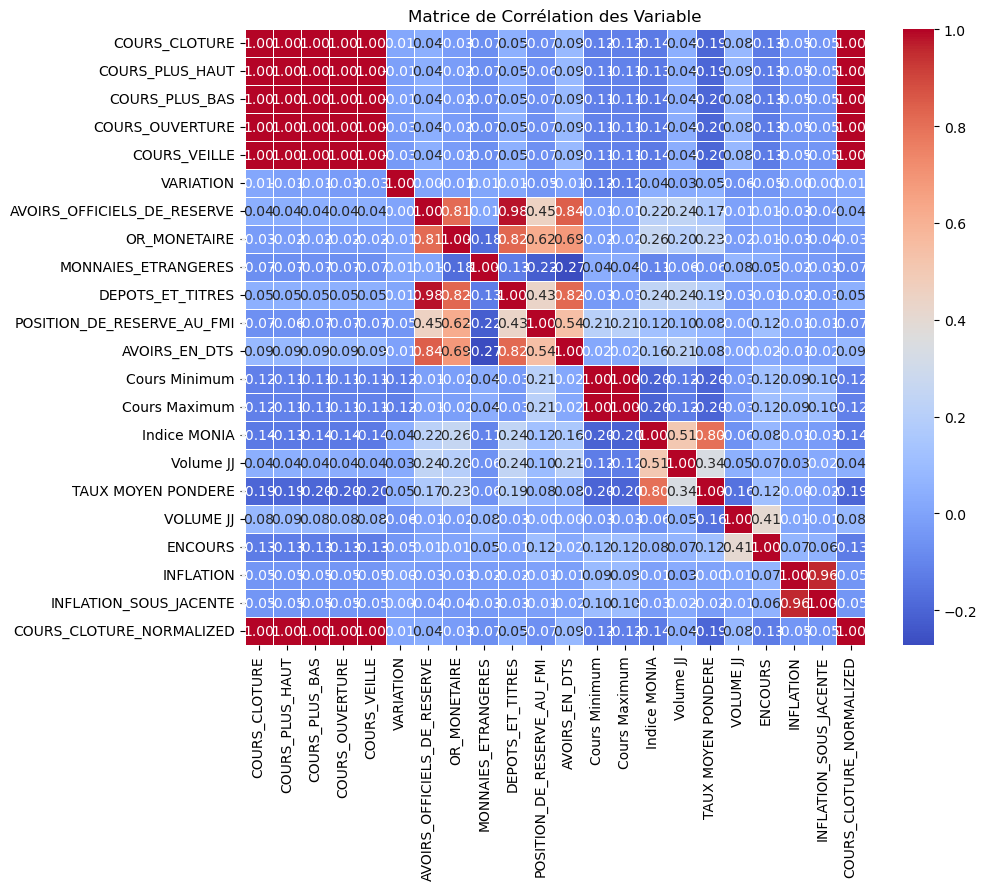

In [512]:
# Explorer la corrélation entre les variables normalisées
correlation_matrix_macroeconomic = df1_norm[df1_norm.columns].corr()

# Utiliser Seaborn pour visualiser la matrice de corrélation des variables macroéconomiques
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_macroeconomic, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variable Normalisées')
plt.show()

In [522]:
correlation_matrix = df1_norm.corr()

# Afficher les corrélations avec la variable cible ('COURS_CLOTURE')
correlation_with_target = correlation_matrix['COURS_CLOTURE'].sort_values(ascending=False)
print("Corrélations avec COURS_CLOTURE :")
print(correlation_with_target)

Corrélations avec COURS_CLOTURE :
COURS_CLOTURE_NORMALIZED       1.000000
COURS_CLOTURE                  1.000000
COURS_PLUS_BAS                 0.999193
COURS_PLUS_HAUT                0.998937
COURS_OUVERTURE                0.997963
COURS_VEILLE                   0.997940
AVOIRS_EN_DTS                  0.087247
VOLUME JJ                      0.081616
DEPOTS_ET_TITRES               0.046115
AVOIRS_OFFICIELS_DE_RESERVE    0.041746
Volume JJ                      0.040779
VARIATION                      0.012725
OR_MONETAIRE                  -0.025241
INFLATION_SOUS_JACENTE        -0.046525
INFLATION                     -0.048934
POSITION_DE_RESERVE_AU_FMI    -0.068523
MONNAIES_ETRANGERES           -0.069976
Cours Maximum                 -0.115618
Cours Minimum                 -0.115625
ENCOURS                       -0.132115
Indice MONIA                  -0.136589
TAUX MOYEN PONDERE            -0.194446
Name: COURS_CLOTURE, dtype: float64


### Transformation des Données

**Création de Nouvelles Caractéristiques (Feature Engineering)**

- Créer de nouvelles caractéristiques basées sur les données existantes pour améliorer la performance des modèles.

In [497]:
# Exemple de création d'une nouvelle caractéristique pour l'indice MASI
df_Indices_Généraux['VARIATION_POSITIVE'] = df_Indices_Généraux['VARIATION'] > 0

**Gestion des Dates**

- Extraire des informations telles que le mois, le jour de la semaine, etc.

In [498]:
# Convertir la colonne 'SEANCE' en type datetime
df_Indices_Généraux['SEANCE'] = pd.to_datetime(df_Indices_Généraux['SEANCE'])

# Extrait le mois
df_Indices_Généraux['MOIS'] = df_Indices_Généraux['SEANCE'].dt.month

# Sélection de Modèle

In [534]:
df1_norm1 = df1_norm.drop("COURS_CLOTURE", axis=1)
# df1_norm2 = df1_norm[["COURS_CLOTURE_NORMALIZED", "COURS_CLOTURE", "COURS_PLUS_BAS", "COURS_PLUS_HAUT", 
#                      "COURS_OUVERTURE", "COURS_VEILLE", "Cours Maximum", "Cours Minimum", "ENCOURS",
#                      "Indice MONIA", "TAUX MOYEN PONDERE"]]

In [535]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(
    df1_norm1,
#     df1_norm2,
    df1_norm['COURS_CLOTURE'],
    test_size=0.2,
    random_state=42
)

In [536]:
X_train.head()

,COURS_CLOTURE_NORMALIZED,COURS_CLOTURE,COURS_PLUS_BAS,COURS_PLUS_HAUT,COURS_OUVERTURE,COURS_VEILLE,Cours Maximum,Cours Minimum,ENCOURS,Indice MONIA,TAUX MOYEN PONDERE
2163,0.235465,0.235465,0.230429,0.228505,0.234595,0.234595,0.395637,0.39561,0.347388,0.384815,0.402133
2447,0.194376,0.194376,0.187133,0.191264,0.195508,0.181596,0.395637,0.39561,0.347388,0.384815,0.402133
2382,0.090786,0.090786,0.082009,0.083907,0.082701,0.080041,0.395637,0.39561,0.347388,0.384815,0.402133
1674,0.450730,0.450730,0.447368,0.452554,0.454308,0.455411,0.395637,0.39561,0.347388,0.384815,0.402133
2019,0.497170,0.497170,0.491366,0.492109,0.487692,0.487692,0.395637,0.39561,0.347388,0.384815,0.402133


In [537]:
y_train.head()

2163    0.235465
2447    0.194376
2382    0.090786
1674    0.450730
2019    0.497170
Name: COURS_CLOTURE, dtype: float64

In [538]:
# Initialiser les modèles
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
neural_network_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Entraînement et Test du Modèle

In [539]:
# Entraîner les modèles
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=42)

In [540]:
# Afficher l'importance des caractéristiques
feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns

# Créer un dataframe pour visualiser l'importance des caractéristiques
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print("Importance des caractéristiques :")
print(feature_importance_df)

Importance des caractéristiques :
                     Feature    Importance
1              COURS_CLOTURE  5.071119e-01
0   COURS_CLOTURE_NORMALIZED  4.903834e-01
2             COURS_PLUS_BAS  1.592306e-03
3            COURS_PLUS_HAUT  7.645345e-04
4            COURS_OUVERTURE  6.995677e-05
5               COURS_VEILLE  6.896069e-05
7              Cours Minimum  3.137212e-06
6              Cours Maximum  2.774079e-06
9               Indice MONIA  1.524933e-06
8                    ENCOURS  1.373159e-06
10        TAUX MOYEN PONDERE  1.822242e-07


In [542]:
# Faire des prédictions sur l'ensemble de test
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
neural_network_predictions = neural_network_model.predict(X_test)

In [543]:
# Évaluer les performances avec la métrique (ici, l'erreur quadratique moyenne)
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)

In [544]:
# Afficher les résultats
print(f"Linear Regression MSE: {linear_mse}")
print(f"Random Forest MSE: {random_forest_mse}")
print(f"Neural Network MSE: {neural_network_mse}") 

## choisir les Features importants
# Linear Regression MSE: 6.8578238437689195e-31
# Random Forest MSE: 2.2234251153722524e-07
# Neural Network MSE: 0.00038296268417663395

Linear Regression MSE: 6.8578238437689195e-31
Random Forest MSE: 2.2234251153722524e-07
Neural Network MSE: 0.00038296268417663395


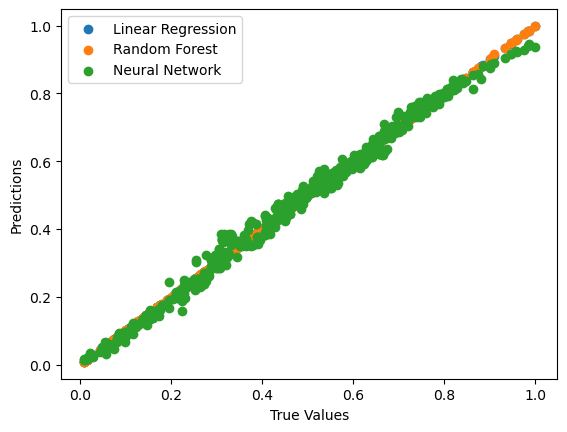

In [545]:
# visualiser les prédictions par rapport aux valeurs réelles
plt.scatter(y_test, linear_predictions, label='Linear Regression')
plt.scatter(y_test, random_forest_predictions, label='Random Forest')
plt.scatter(y_test, neural_network_predictions, label='Neural Network')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Optimisation et Validation

Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (après optimisation) : 2.2234251153722524e-07


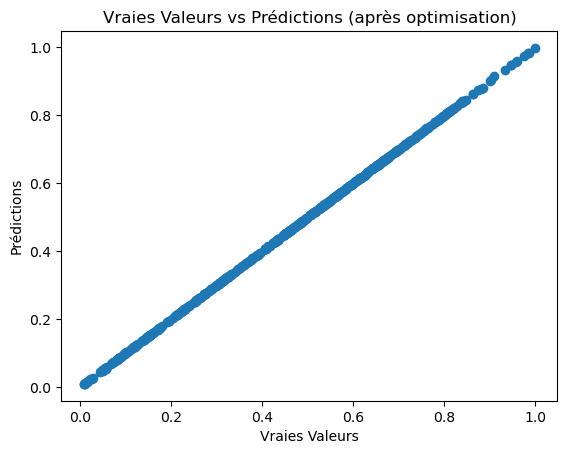

In [546]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle de forêt aléatoire
model = RandomForestRegressor(random_state=42)

# Initialiser la recherche sur grille
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécuter la recherche sur grille sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Évaluer les performances du modèle optimisé
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (après optimisation) : {mse}')

# Visualiser les prédictions par rapport aux vraies valeurs
plt.scatter(y_test, predictions)
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Vraies Valeurs vs Prédictions (après optimisation)')
plt.show()

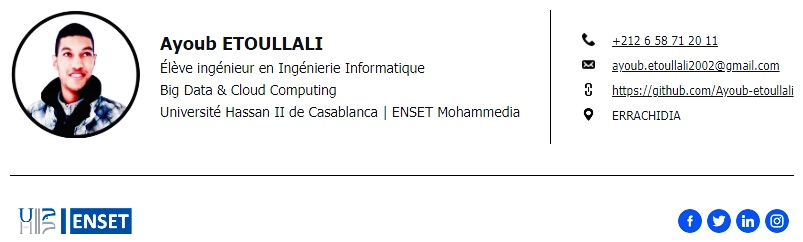